Phase 1 : Veille et exploration théorique

Objectif : Comprendre les concepts clés de la validation croisée (cross-validation), de l'optimisation d'hyperparamètres (GridSearchCV et RandomizedSearchCV). (cf Fichier PDF pour les questions)

## Phase 2 : Compréhension et exploration des données
**Objectif** : Examiner la structure et les caractéristiques principales des données.


In [ ]:
import pandas as pd

data=pd.read_csv('loan-data.csv') # Chargement du CSV

data.head() # Première visualisation des données

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(data.shape)
print()
data.info()

(981, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
data.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,981,957,978,956,981,926,981,614
unique,981,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,775,631,545,763,807,349,422


Viasualisation des données

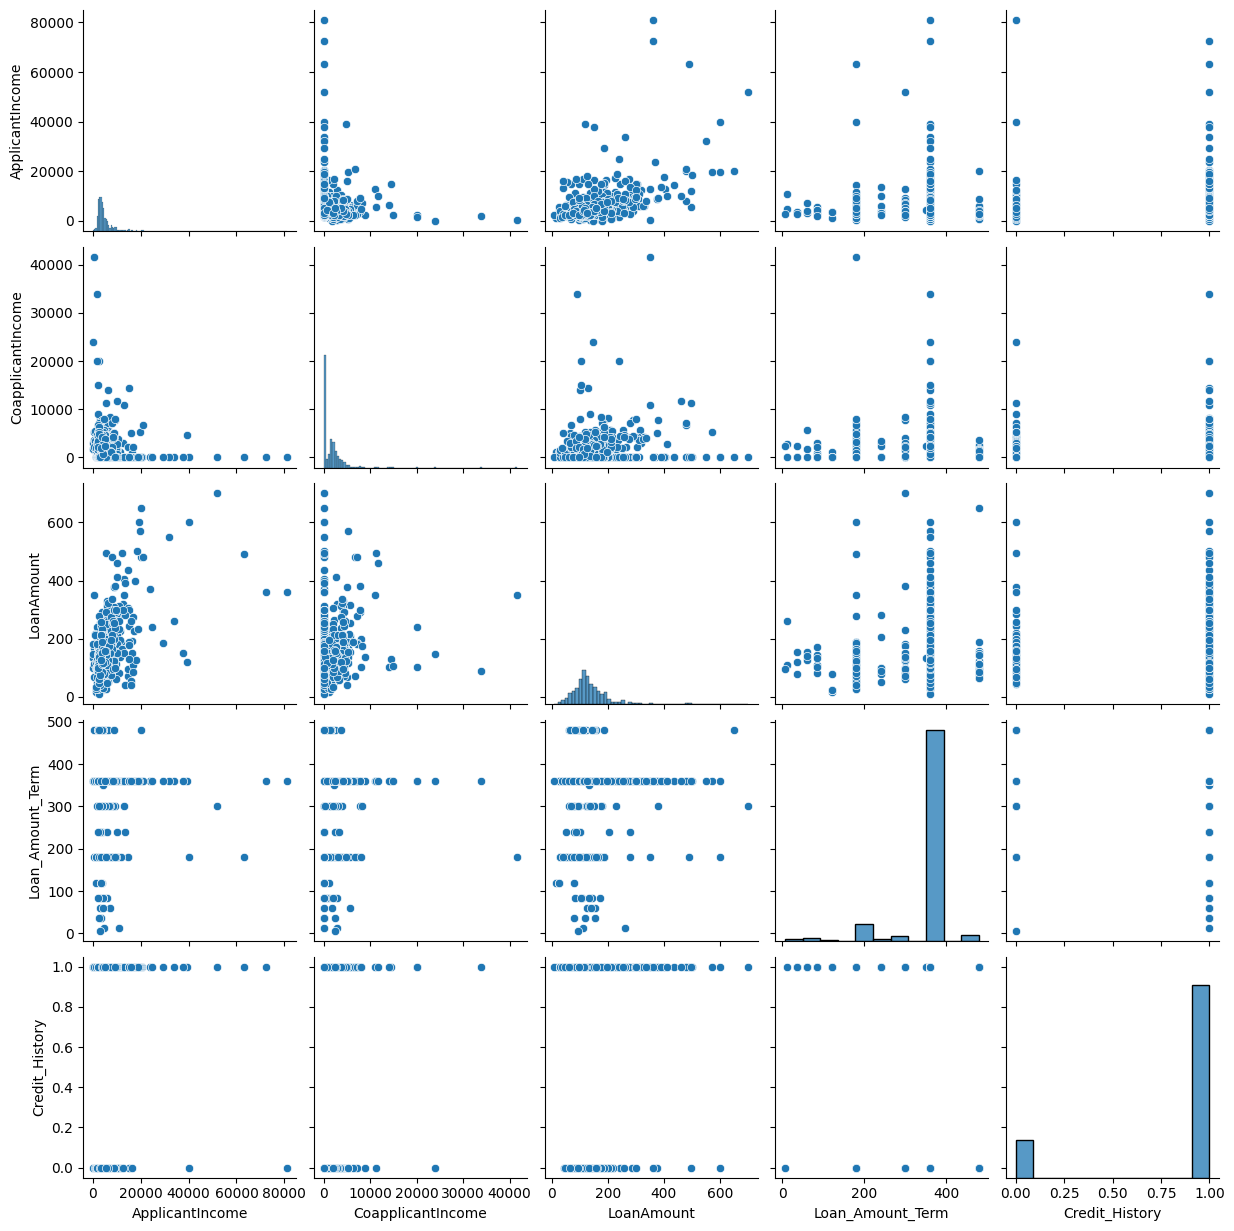

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, )
plt.show()

<Axes: >

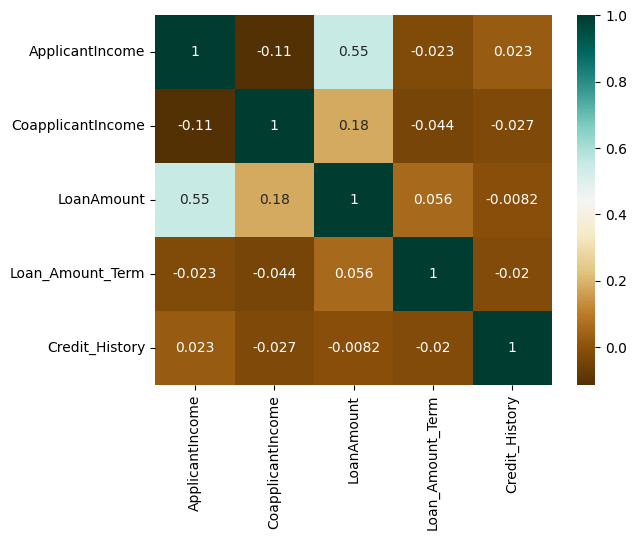

In [ ]:
numeric_data = data.select_dtypes(include=['number'])  # Sélection des colonnes avec des données numériques
correlation_matrix = numeric_data.corr()  # Mise en place de la corrélation

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')

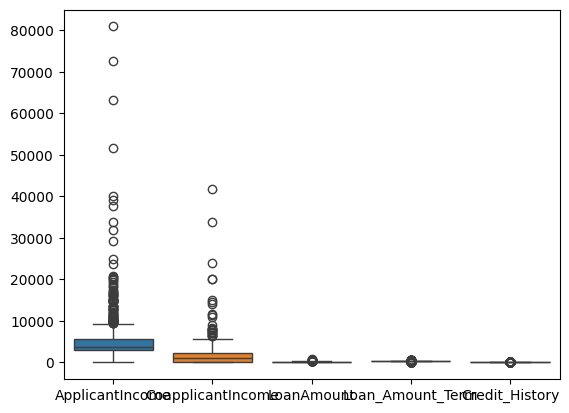

In [ ]:
sns.boxplot(data)
data = data.drop('Loan_ID', axis=1)

# Phase 3 : Prétraitement des données

**Objectif** : Nettoyer et transformer les données pour préparer un jeu propre et utilisable. Identifier les données qui vous serviront à prédire l'éligibilité des clients aux crédits et qui ne sont pas à inclure dans les données d'entrainements et de test.


## Traitement des valeurs nulles

In [ ]:
data.isnull().sum()

,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20
Credit_History,79


Dans notre projet, on souhaite connaître si les crédits sont accordés ou pas en fonction des autres paramêtres. Ainsi, notre target est le contenu de la colonne Loan_Status. Nous n'avons donc pas d'intérêt à conserver des lignes dont on ne connait pas la valeur de Loan_Status.



In [ ]:
data_null = data.dropna(subset=['Loan_Status'])

# Vérifier le nombre de valeurs nulles après suppression
data_null.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Pour les valeurs catégorielles, comme le genre, le statut marital, le nombre de personnes à charge ainsi que le statut employé/indépendant, on peut les remplacer par une valeur 'Unknown', créant une nouvelle valeur pour la catégorie.

In [ ]:
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed']
data_null[columns_to_fill] = data_null[columns_to_fill].fillna('Unknown')

data_null.isnull().sum() # on contrôle que les changements ont bien été pris en compte

<ipython-input-89-10b791aef4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null[columns_to_fill] = data_null[columns_to_fill].fillna('Unknown')


,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Pour les valeurs numériques, comme les colonnes LoanAmount, Loan_Amount_Term et Credit_History, on peut remplacer les valeurs vides par la valeur de la médiane.

In [ ]:
data_null['LoanAmount']=data_null['LoanAmount'].fillna(data_null['LoanAmount'].mean())
data_null['Loan_Amount_Term']=data_null['Loan_Amount_Term'].fillna(data_null['Loan_Amount_Term'].mean())
data_null['Credit_History']=data_null['Credit_History'].fillna(data_null['Credit_History'].mean())

data_null.isnull().sum() # on contrôle que les changements ont bien été pris en compte

<ipython-input-90-656563c3592a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null['LoanAmount']=data_null['LoanAmount'].fillna(data_null['LoanAmount'].mean())
<ipython-input-90-656563c3592a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_null['Loan_Amount_Term']=data_null['Loan_Amount_Term'].fillna(data_null['Loan_Amount_Term'].mean())
<ipython-input-90-656563c3592a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


La copie data_null de notre base de données ne contient plus de valeurs vides.

## Traitement des doublons

In [ ]:
data_null.duplicated().sum()

0

Notre base de données ne contient pas de doublons.

## Traitement des valeurs aberrantes

In [ ]:
data_null.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
import numpy as np
import pandas as pd

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

colonnes_etudiees=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for colonne in colonnes_etudiees:
    outliers = detect_outliers(data_null, colonne)
    print(f"Outliers dans la colonne '{colonne}':")
    print(outliers)

Outliers dans la colonne 'ApplicantIncome':
      Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
9       Male     Yes          1      Graduate            No            12841   
34      Male      No         3+      Graduate            No            12500   
54    Female     Yes          1      Graduate           Yes            11500   
67      Male     Yes          1      Graduate            No            10750   
102     Male     Yes    Unknown      Graduate            No            13650   
106     Male     Yes          2      Graduate            No            11417   
115     Male     Yes          1      Graduate            No            14583   
119   Female      No          0      Graduate            No            10408   
126  Unknown     Yes         3+      Graduate            No            23803   
128     Male     Yes          1      Graduate           Yes            10513   
130     Male      No          0      Graduate           Yes            20166

## Encodage des données catégorielles

In [ ]:
import matplotlib.pyplot as plt
# Génération des variables dummy
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})

dummies = pd.get_dummies(data['Self_Employed'], prefix='self_employed')
data = pd.concat([data.drop('Self_Employed', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Property_Area'], prefix='Property_Area')
data = pd.concat([data.drop('Property_Area', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Gender'], prefix='Gender')
data = pd.concat([data.drop('Gender', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Education'], prefix='Education')
data = pd.concat([data.drop('Education', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Credit_History'], prefix='Credit_History')
data = pd.concat([data.drop('Credit_History', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Married'], prefix='Married')
data = pd.concat([data.drop('Married', axis=1), dummies], axis=1)

dummies = pd.get_dummies(data['Dependents'], prefix='Dependents')
data = pd.concat([data.drop('Dependents', axis=1), dummies], axis=1)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,self_employed_No,self_employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,...,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,True,...,True,False,False,True,True,False,True,False,False,False
1,4583,1508.0,128.0,360.0,0.0,True,False,True,False,False,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,True,...,True,False,False,True,False,True,True,False,False,False
3,2583,2358.0,120.0,360.0,1.0,True,False,False,False,True,...,False,True,False,True,False,True,True,False,False,False
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,True,...,True,False,False,True,True,False,True,False,False,False


In [ ]:
colonnes=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

data_encoded = data_null.copy() # on crée une copie de la dernière version de data, sur laquelle on va travailler
data_encoded['Loan_Status'] = data_encoded['Loan_Status'].replace({'Y': 1, 'N': 0})

for colonne in colonnes:
      dummies = pd.get_dummies(data_encoded[colonne], prefix=colonne)
      data_encoded = pd.concat([data_encoded.drop([colonne], axis=1), dummies], axis=1)


data_encoded.head()

<ipython-input-112-7ec85adffd74>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded['Loan_Status'] = data_encoded['Loan_Status'].replace({'Y': 1, 'N': 0})


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_Unknown,Married_No,...,Dependents_3+,Dependents_Unknown,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,1,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,1,False,True,False,False,...,False,False,False,True,True,False,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,1,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True


In [ ]:
data_encoded.drop('Loan_ID', axis=1, inplace=True)

KeyError: "['Loan_ID'] not found in axis"

## Normalisation et Standardisation des variables

### Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instancier un objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation
data_normalized = scaler.fit_transform(data_encoded.select_dtypes(include=['number']))

print(data_normalized)



[[0.07048856 0.         0.19885986 0.74358974 1.         1.        ]
 [0.05482993 0.03619171 0.17221418 0.74358974 1.         0.        ]
 [0.03525046 0.         0.08248915 0.74358974 1.         1.        ]
 ...
 [0.09798392 0.00575995 0.35311143 0.74358974 1.         1.        ]
 [0.09193568 0.         0.25759768 0.74358974 1.         1.        ]
 [0.05482993 0.         0.17945007 0.74358974 0.         0.        ]]


### Standardisation

## Autres traitements des données

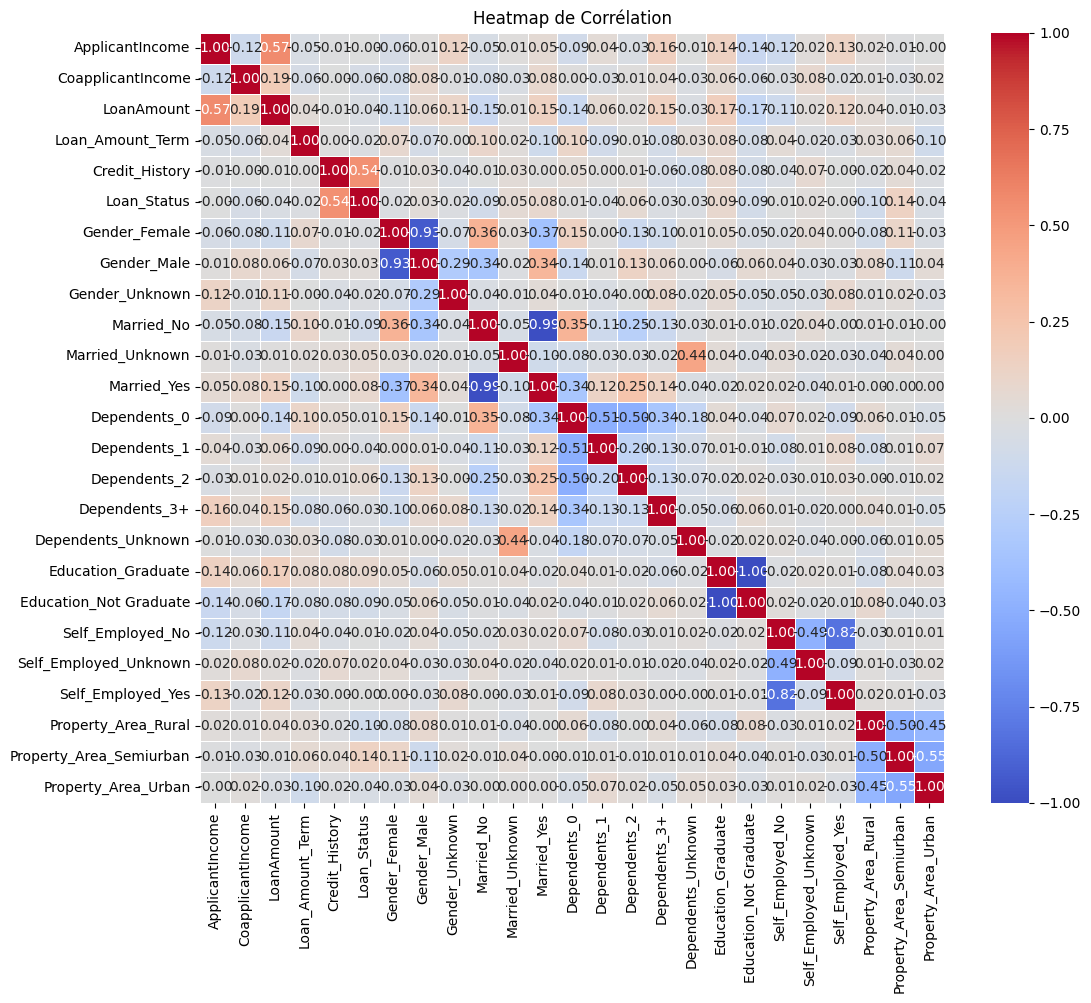

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = data_encoded.corr()

# Créer la heatmap
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# Afficher la heatmap
plt.title('Heatmap de Corrélation')
plt.show()


# Phase 4 : Entraînement et optimisation des modèles
**Objectif** : Tester plusieurs algorithmes de classification et optimiser leurs hyperparamètres.

Phase 5 : Évaluation et interprétation : Évaluer la performance des modèles, analyser l'importance des caractéristiques et interpréter les résultats

Phase 6 : Exportation et utilisation du modèle final : Sauvegarder le modèle sélectionné avec les hyperparamètres optimaux et démontrer comment l'importer pour effectuer des prédictions sur de nouvelles données.

## Division des données en ensemble d'entrainement et de test

### Modèle KNN

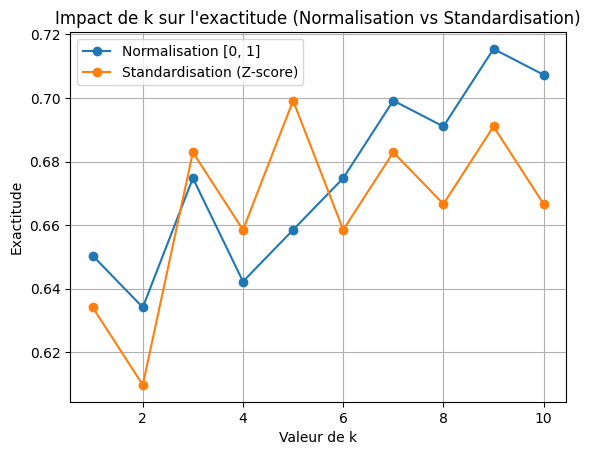

Précision finale avec k=5 : 0.66


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X=data_encoded.drop('Loan_Status', axis=1)  # X = les données hors target
y=data_encoded['Loan_Status']               # y = les données dans la colonne target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

model_knn = KNeighborsClassifier()  # Instancie le modèle avec les paramètres par défaut
model_knn.fit(X_train, y_train)  # Entraîne le modèle sur les données d'entraînement

y_pred=model_knn.predict(X_test)
#print('KNN :',y_pred)
#print('test :', y_test)

# Normalisation (MinMaxScaler)
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# Standardisation (StandardScaler)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Tester différentes valeurs de k
k_values = range(1, 11)
accuracy_scores_norm = []
accuracy_scores_std = []

for k in k_values:
    # Modèle KNN avec données normalisées
    knn_norm = KNeighborsClassifier(n_neighbors=k)
    knn_norm.fit(X_train_norm, y_train)
    y_pred_norm = knn_norm.predict(X_test_norm)
    accuracy_scores_norm.append(accuracy_score(y_test, y_pred_norm))

    # Modèle KNN avec données standardisées
    knn_std = KNeighborsClassifier(n_neighbors=k)
    knn_std.fit(X_train_std, y_train)
    y_pred_std = knn_std.predict(X_test_std)
    accuracy_scores_std.append(accuracy_score(y_test, y_pred_std))

# Visualiser les résultats
import matplotlib.pyplot as plt

plt.plot(k_values, accuracy_scores_norm, label="Normalisation [0, 1]", marker='o')
plt.plot(k_values, accuracy_scores_std, label="Standardisation (Z-score)", marker='o')
plt.xlabel("Valeur de k")
plt.ylabel("Exactitude")
plt.title("Impact de k sur l'exactitude (Normalisation vs Standardisation)")
plt.legend()
plt.grid(True)
plt.show()

# Meilleur k sélectionné
best_k = 5

# Appliquer KNN
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_norm, y_train)  # Utiliser les données normalisées (ou standardisées)
y_pred_final = knn_final.predict(X_test_norm)

# Évaluer la précision
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Précision finale avec k={best_k} : {final_accuracy:.2f}")



### Modèle Régression Logistique

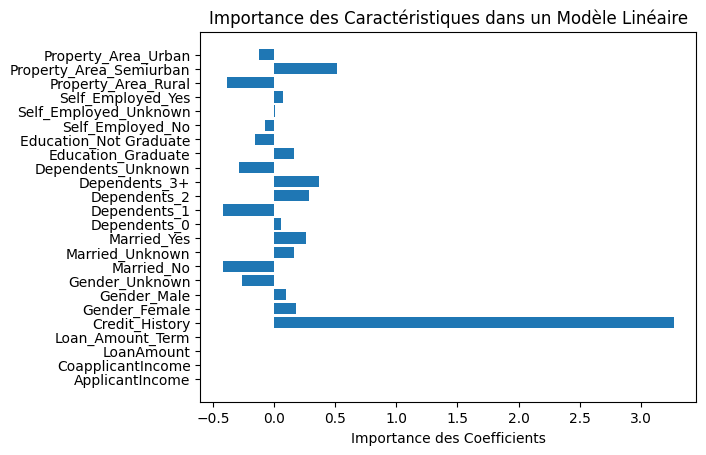

Intercept: -1.723268585066704


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=data_encoded.drop('Loan_Status', axis=1)  # X = les données hors target
y=data_encoded['Loan_Status']               # y = les données dans la colonne target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Normalisation (MinMaxScaler)
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm = scaler_norm.transform(X_test)

# Standardisation (StandardScaler)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model_LR = LogisticRegression(max_iter=1000000000)  # Instancie le modèle avec les paramètres par défaut
model_LR.fit(X_train, y_train)   # Entraîne le modèle sur les données d'entraînement

# Prédire les classes avec le modèle de Régression Logistique
y_pred=model_LR.predict(X_test)

# Récupérer les coefficients et l'intercept pour la régression logistique
feature_names = X_train.columns     # Noms des caractéristiques
coefficients = model_LR.coef_[0]    # Coefficients pour LogisticRegression
intercept = model_LR.intercept_[0]  # Interception (biais)

# Visualiser les coefficients
plt.barh(feature_names, coefficients)
plt.xlabel("Importance des Coefficients")
plt.title("Importance des Caractéristiques dans un Modèle Linéaire")
plt.show()

# Afficher l'intercept
print("Intercept:", intercept)


Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



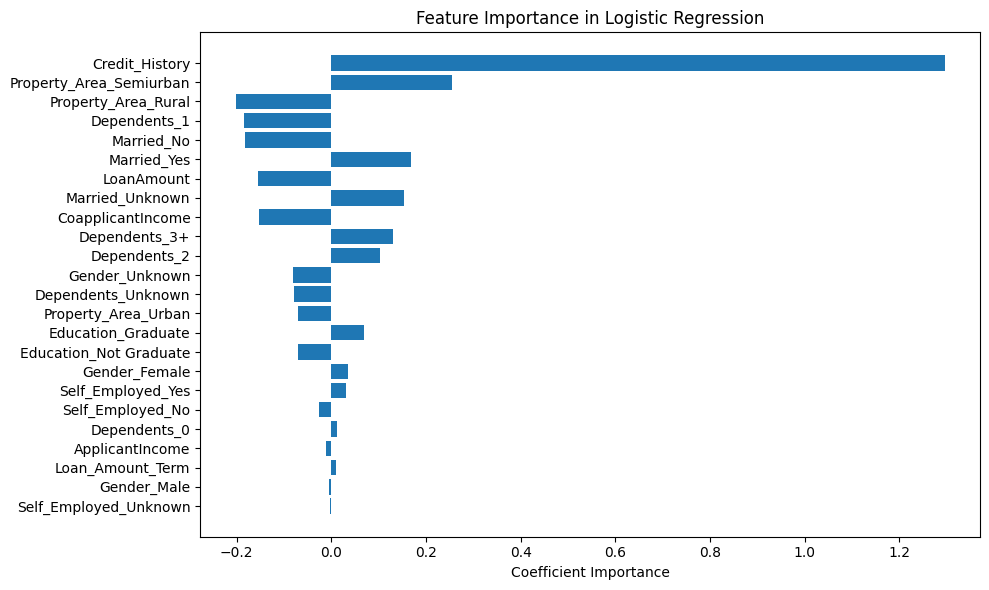

Intercept: 0.9512842438569004


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Split dataset
X = data_encoded.drop('Loan_Status', axis=1)
y = data_encoded['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train_scaled, y_train)

# Predict
y_pred = model_LR.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Extract coefficients and intercept
feature_names = X.columns
coefficients = model_LR.coef_[0]
intercept = model_LR.intercept_[0]

# Plot feature importance
sorted_idx = np.argsort(np.abs(coefficients))
sorted_features = feature_names[sorted_idx]
sorted_coefficients = coefficients[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients)
plt.xlabel("Coefficient Importance")
plt.title("Feature Importance in Logistic Regression")
plt.tight_layout()
plt.show()

# Intercept
print("Intercept:", intercept)


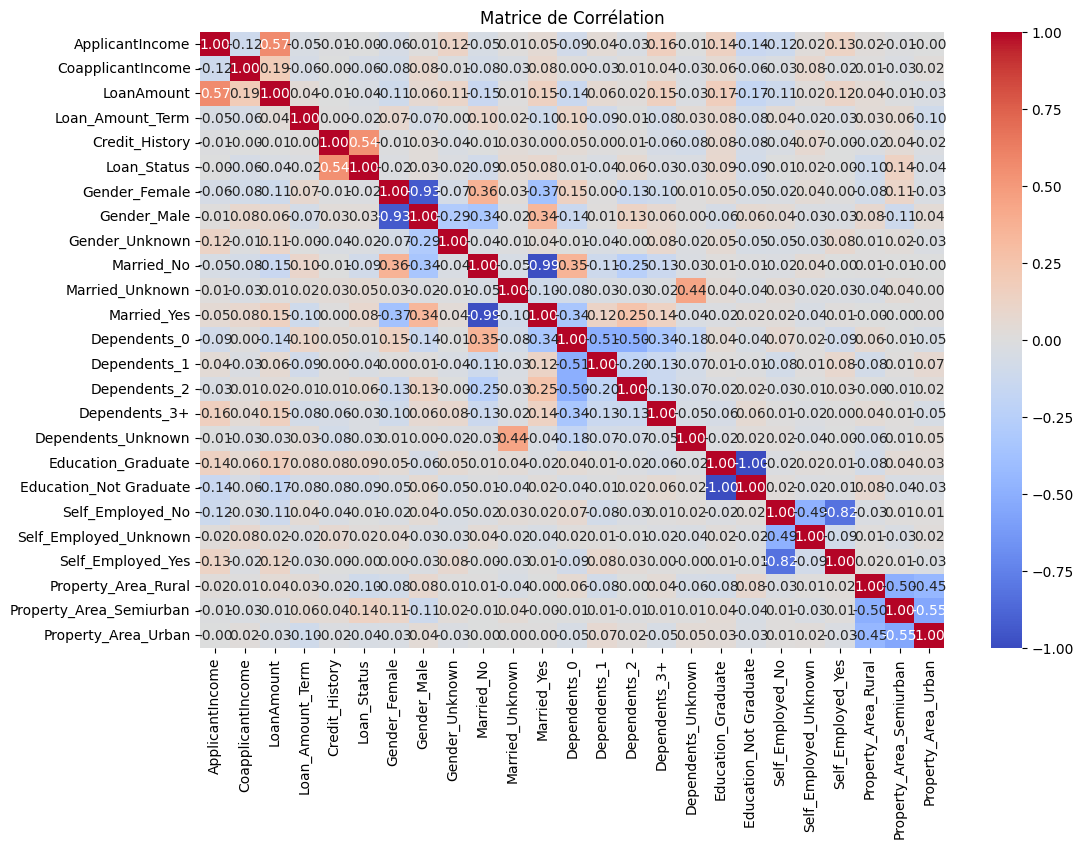

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = data_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()
